<a href="https://colab.research.google.com/github/mdtanjimrahman/Machine-Learning/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog, canny
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from skimage.filters import sobel, gabor
from skimage.measure import regionprops
from skimage.morphology import disk
from skimage import data
from skimage.filters import gabor
from scipy.fft import fft2, fftshift
from skimage.transform import integral_image, rotate
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [168]:
# Mount Google Drive
drive.mount('/content/drive')

# Load image
image_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning/bird.jpg'
image = cv2.imread(image_path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

if image is None:
    print("Error: Image not found. Check the file path.")
else:
    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


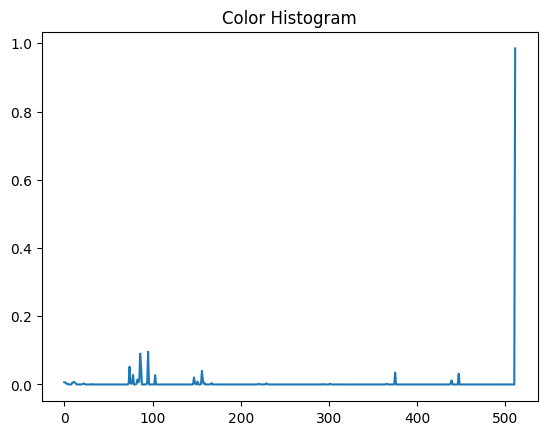

In [169]:
# 1. Color Histogram
def extract_color_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

color_hist = extract_color_histogram(image)
plt.figure()
plt.title("Color Histogram")
plt.plot(color_hist)
plt.show()

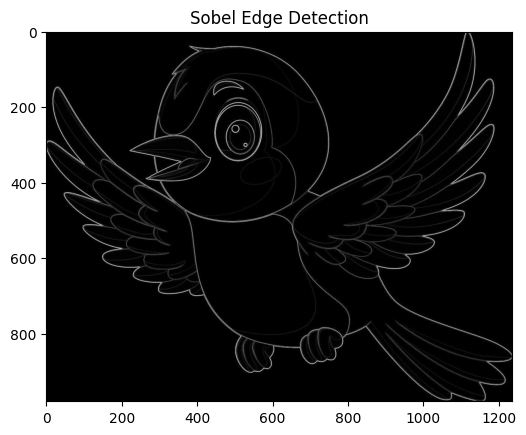

In [170]:
# Sobel Edge Detection
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)

plt.figure()
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')
plt.show()


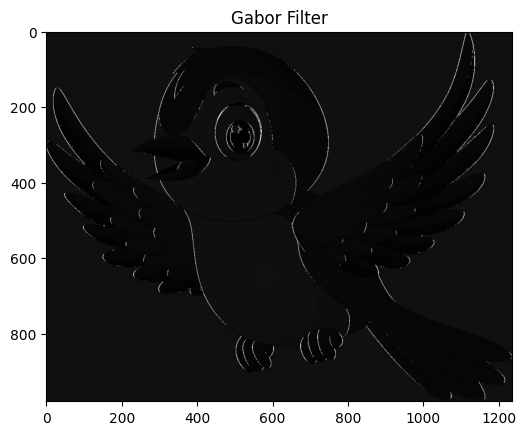

In [172]:
# Gabor Filter
def gabor_features(image, frequency=0.6):
    filtered_real, filtered_image = gabor(image, frequency=frequency)
    return filtered_real

gabor_img = gabor_features(gray_img)

plt.figure()
plt.title("Gabor Filter")
plt.imshow(gabor_img, cmap='gray')
plt.show()

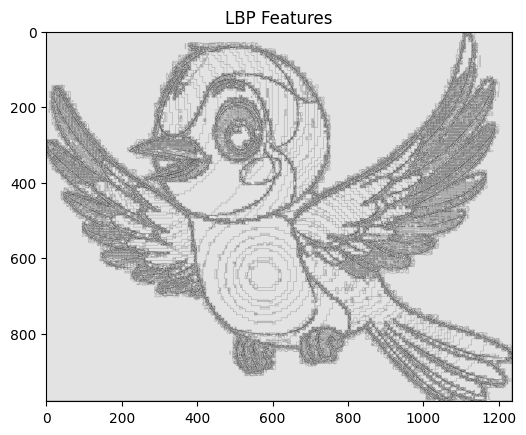

In [173]:
# Local Binary Points (LBP)
def lbp_features(image):
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    return lbp

lbp_img = lbp_features(gray_img)

plt.figure()
plt.title("LBP Features")
plt.imshow(lbp_img, cmap='gray')
plt.show()

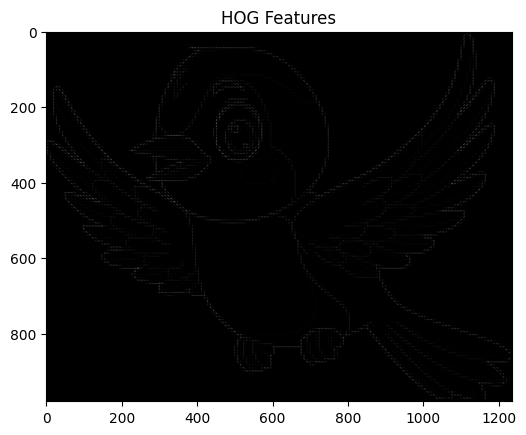

In [174]:
# Histogram of Oriented Gradients (HOG)
def hog_features(image):
    features, hog_img = hog(image, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return features, hog_img

hog_feat, hog_img = hog_features(gray_img)

plt.figure()
plt.title("HOG Features")
plt.imshow(hog_img, cmap='gray')
plt.show()

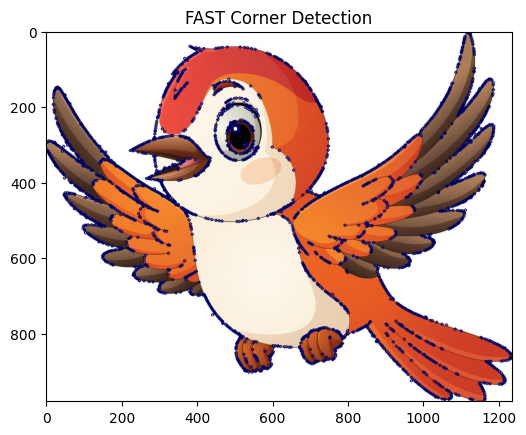

In [181]:
# FAST Corner detection
fast = cv2.FastFeatureDetector_create()
fast.setThreshold(20)
keypoints = fast.detect(gray_img, None)

# Draw keypoints on the original image
keypoints = fast.detect(gray_img, None)
image_with_keypoints = cv2.drawKeypoints(image_with_keypoints, keypoints, outImage=image_with_keypoints, color=(100, 0, 0))

plt.figure()
plt.title("FAST Corner Detection")
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()

<ipython-input-180-e92d0d7339a2>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False, pooling='avg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Text(0, 0.5, 'Feature Value')

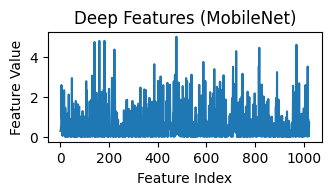

In [180]:
# Deep Learning Feature (MobileNet)
def extract_deep_features_mobilenet(image_path):
    model = MobileNet(weights='imagenet', include_top=False, pooling='avg')
    img = image.load_img(image_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

# Plot
deep_features_mobilenet = extract_deep_features_mobilenet(image_path)
deep_features_mobilenet_np = np.array(deep_features_mobilenet)
plt.figure(figsize=(12, 10))
plt.subplot(6, 3, 6)
plt.title("Deep Features (MobileNet)")
plt.plot(deep_features_mobilenet_np.flatten())
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')